In [1]:
from pandas_datareader import data
import csv
import pandas as pd
import pandas_datareader as web
import sys
import io
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))

from pandas.plotting import register_matplotlib_converters

In [2]:
# We will look at stock prices, starting at March 1, 2019
start = datetime.datetime(2019,3,15)
end = datetime.datetime(2019,4,16)
#end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
 


apple['Date'] = apple.index
apple.reset_index(drop=True)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-03-15,187.330002,183.740005,184.850006,186.119995,39042900,186.119995,2019-03-15
2019-03-18,188.389999,185.789993,185.800003,188.020004,26219800,188.020004,2019-03-18
2019-03-19,188.990005,185.919998,188.350006,186.529999,31646400,186.529999,2019-03-19
2019-03-20,189.490005,184.729996,186.229996,188.160004,31035200,188.160004,2019-03-20
2019-03-21,196.330002,189.809998,190.020004,195.089996,51034200,195.089996,2019-03-21


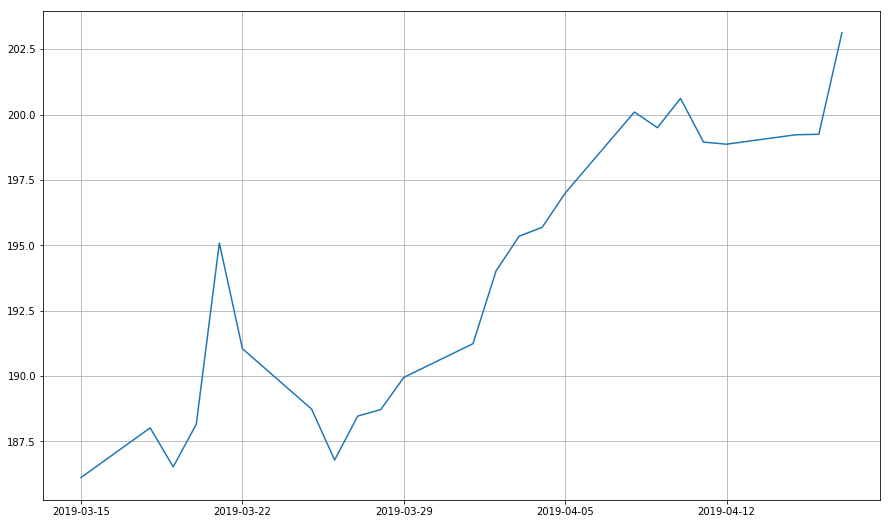

In [3]:
apple.to_csv('Apple_Stock.csv',index=False)
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(apple.index,apple.Close)

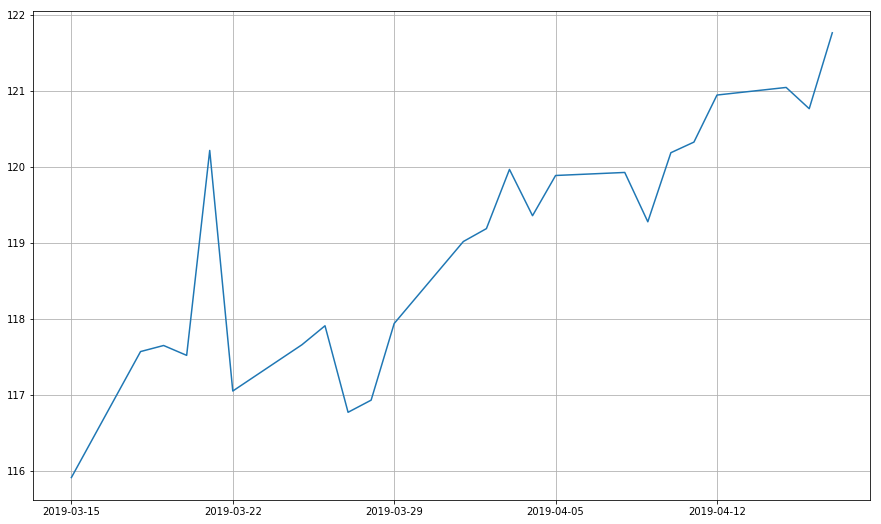

In [4]:
# Let's get Microsoft stock data; The ticker symbol is MSFT
Microsoft = web.DataReader("MSFT", "yahoo", start, end)
 
Microsoft.reset_index()
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Microsoft.index,Microsoft.Close)

In [5]:
Microsoft.to_csv('Microsoft_stock.csv',index=False)

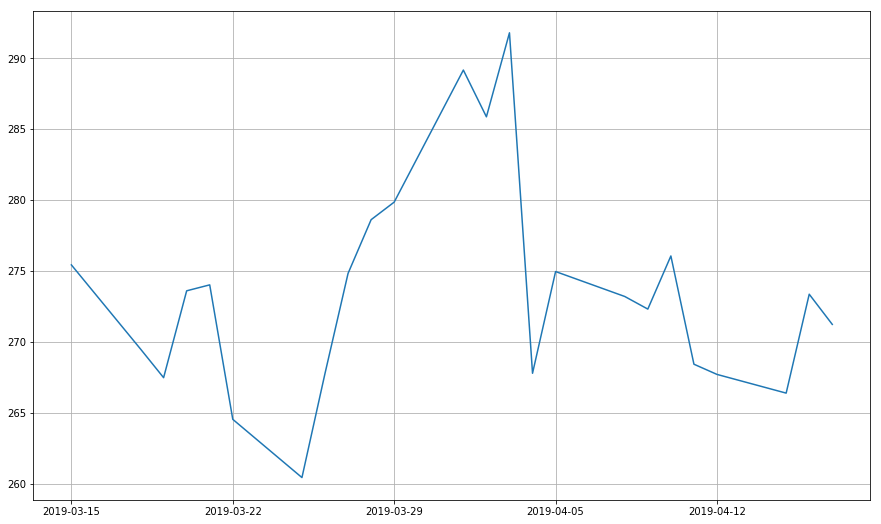

In [6]:
# Let's get Tesla stock data; The ticker symbol is TSLA
Tesla= web.DataReader("TSLA", "yahoo", start, end)
 
Tesla.reset_index()
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Tesla.index,Tesla.Close)

In [7]:
Tesla.to_csv('Tesla_stock.csv',index=False)

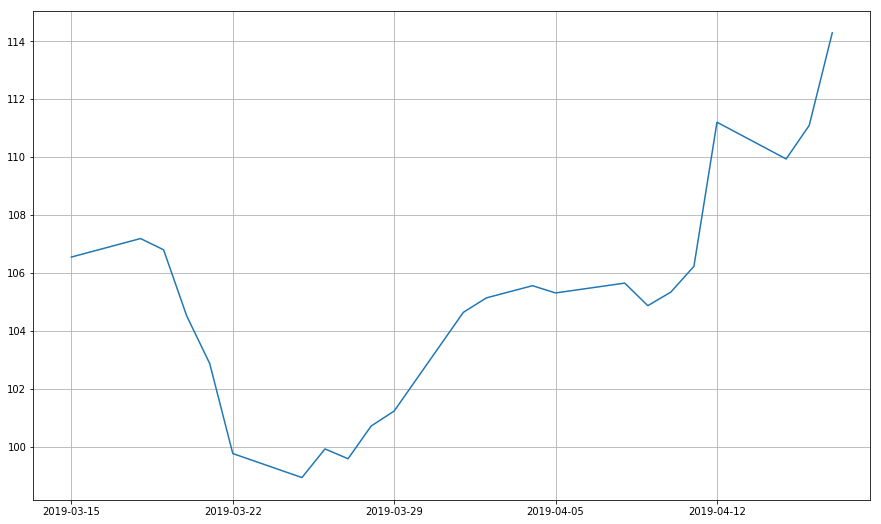

In [8]:
# Let's get JP Morgan stock data; The ticker symbol is JPM
JPMorgan = web.DataReader("JPM", "yahoo", start, end)
 
JPMorgan.reset_index()
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(JPMorgan.index,JPMorgan.Close)

In [9]:
JPMorgan.to_csv('JPMorgan_stock.csv',index=False)

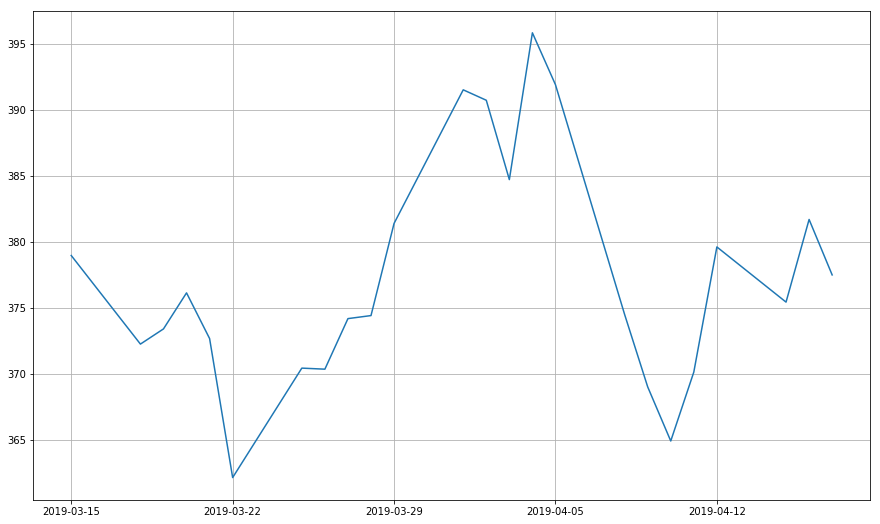

In [10]:
# Let's get Boeing stock data; The ticker symbol is BA
BA = web.DataReader("BA", "yahoo", start, end)
 
BA.reset_index()
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(BA.index, BA.Close)


In [11]:
BA.to_csv('Boeing_stock.csv',index=False)

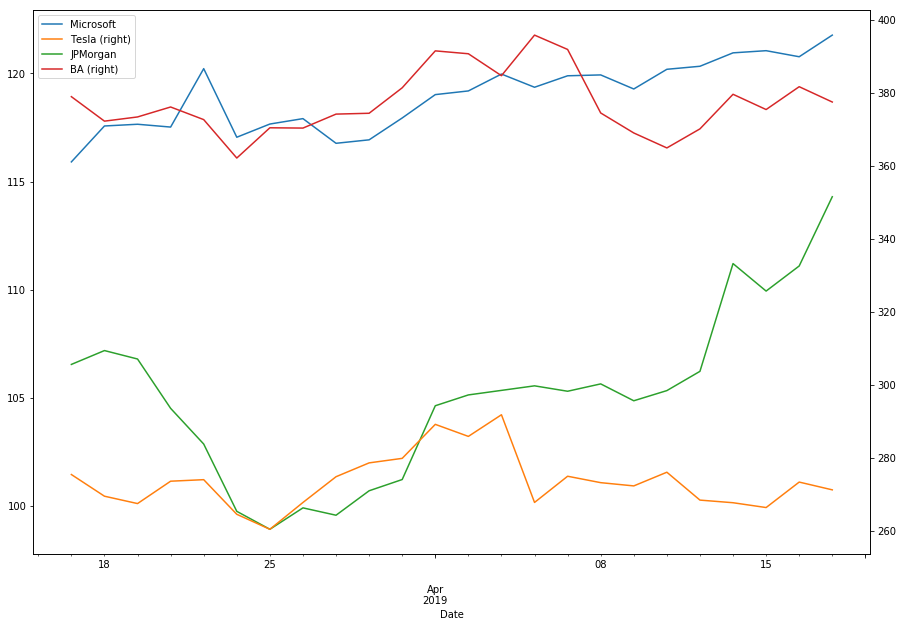

In [12]:
stock_commbine_close = pd.DataFrame()
stock_commbine_close['Microsoft'] = Microsoft.Close
stock_commbine_close['Tesla'] = Tesla.Close
stock_commbine_close['JPMorgan'] = JPMorgan.Close
stock_commbine_close['BA'] = BA.Close
stock_commbine_close.to_csv()
stock_commbine_close

#stock_commbine_close.plot(grid=True)
stock_commbine_close.plot(secondary_y = ['BA', 'Tesla'],figsize=(15,10))

In [13]:
close = BA['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start, end=end, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [14]:
print(all_weekdays)

DatetimeIndex(['2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01',
               '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16'],
              dtype='datetime64[ns]', freq='B')


In [15]:
close.head(10)

2019-03-15    378.989990
2019-03-18    372.279999
2019-03-19    373.429993
2019-03-20    376.160004
2019-03-21    372.700012
2019-03-22    362.170013
2019-03-25    370.459991
2019-03-26    370.380005
2019-03-27    374.209991
2019-03-28    374.440002
Freq: B, Name: Close, dtype: float64

In [16]:
close.describe()

count     23.000000
mean     377.258261
std        8.866151
min      362.170013
25%      371.369995
50%      374.519989
75%      381.570007
max      395.859985
Name: Close, dtype: float64

In [17]:
stock_commbine_volume = pd.DataFrame()
stock_commbine_volume['Date'] = apple.Date
stock_commbine_volume['Apple'] = apple.Volume
stock_commbine_volume['Microsoft'] = Microsoft.Volume
stock_commbine_volume['Tesla'] = Tesla.Volume
stock_commbine_volume['JPMorgan'] = JPMorgan.Volume
stock_commbine_volume['BA'] = BA.Volume
#stock_commbine_volume.to_csv()
#stock_commbine_volume
#stock_commbine_volume.plot(figsize=(15,10), grid=True)
stock_commbine_volume.set_index(keys='Date', drop=True)
stock_commbine_volume.drop(columns='Date', axis=1)
stock_commbine_volume

,Date,Apple,Microsoft,Tesla,JPMorgan,BA
Date,,,,,,
2019-03-15,2019-03-15,39042900,54681100,14785500,24811700.0,26697700
2019-03-18,2019-03-18,26219800,31207600,10281000,12935500.0,13119200
2019-03-19,2019-03-19,31646400,37588700,11800600,12889300.0,9856100
2019-03-20,2019-03-20,31035200,28113300,6908200,14920700.0,8737600
2019-03-21,2019-03-21,51034200,29854400,5947100,19751000.0,6951000
2019-03-22,2019-03-22,42407700,33624500,8745600,31115200.0,10143900
2019-03-25,2019-03-25,43845300,27067100,10215000,21032300.0,7939600
2019-03-26,2019-03-26,49800500,26097700,7350900,15987100.0,6479700
2019-03-27,2019-03-27,29848400,22733400,8779200,12753200.0,9600000


Text(0.5,1,'Volume of Stock-Trade')

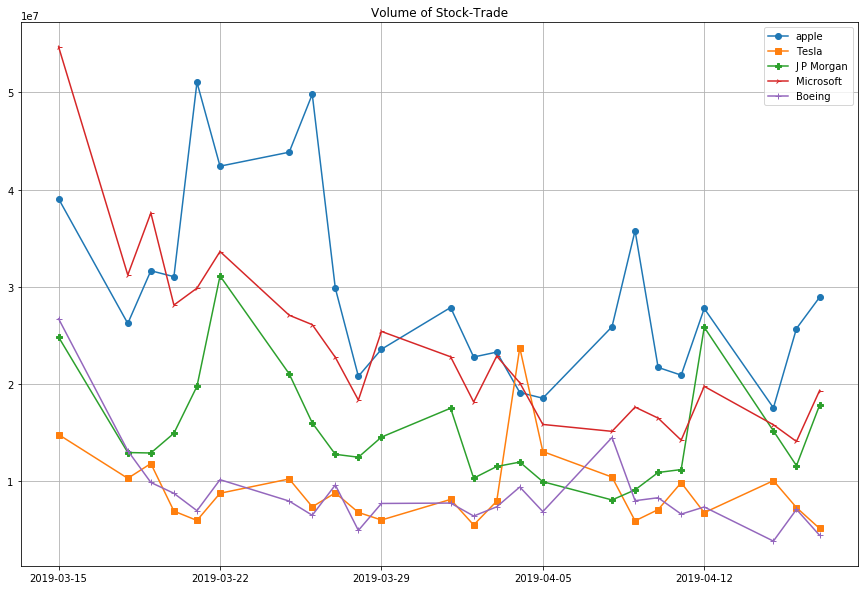

In [45]:
fig,ax=plt.subplots(figsize=(15,10))

plt.plot(apple.index, apple['Volume'], marker = 'o')
plt.plot(Tesla.index, Tesla['Volume'], marker = 's')
plt.plot(JPMorgan.index, JPMorgan['Volume'], marker = 'P')
plt.plot(Microsoft.index, Microsoft['Volume'], marker = '4')
plt.plot(BA.index, BA['Volume'], marker = '+')

#plt.figure(figsize=(20,12))
#plt.legend([apple1],['apple1'])
ax.legend(['apple', 'Tesla', 'J P Morgan', 'Microsoft',"Boeing"])
ax.grid()
ax.set_title("Volume of Stock-Trade")